# Projet 4: Analysez les ventes de votre entreprise (1)

In [1]:
# Import des librairies
import numpy as np
print(f"numpy version {np.__version__}")
import pandas as pd
print(f"pandas version {pd.__version__}")
import seaborn as sns
print(f"seaborn version {sns.__version__}")
import datetime as dt
import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
# import statsmodels.api as sm
# Pour afficher les graphiques sans avoir à appeler .show() : %matplotlib inline

numpy version 1.14.3
pandas version 0.23.0
seaborn version 0.8.1


# Mission 1 : Nettoyage des données

Avant de pouvoir entrer dans le vif du sujet, il vous faudra faire un peu de nettoyage ! Par exemple, vous devrez faire des choix quant au traitement des valeurs manquantes et des valeurs aberrantes.

## 1. Table clients

In [2]:
# Import des données de la table customers
clients = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/data/customers.csv")

In [3]:
clients.shape

(8623, 3)

In [5]:
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [56]:
# Affichage des valeurs nulles s'il y en a
clients.isnull().any()

client_id    False
sex          False
birth        False
dtype: bool

In [3]:
# Présence de doublons dans client_id ? 
clients[clients.duplicated()].sort_values(by='client_id').head()

,client_id,sex,birth


client_id est une clé primaire.

In [6]:
# Vérification du type des données
clients.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [6]:
# 1er aperçu des données
clients.describe(include="all")

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4696,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


- Plus de 8000 clients
- Nés entre 1929 et 2004.

In [8]:
clients['client_id'].max()

'ct_1'

In [9]:
# Je cherche les lignes avec ct_ dans l'id : 
clients[clients['client_id'].str.contains('^ct')==True]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [3]:
# Je supprime ces lignes (vu avec le df "products" : ce sont des tests)
clients = clients.drop([2735,8494])

Text(0.5,1,'Répartition des clients par sexe')

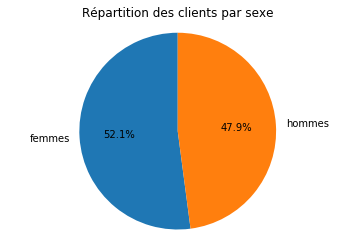

In [5]:
# Répartition des clients par sexes
plt.pie(clients['sex'].value_counts(), labels=["femmes", "hommes"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition des clients par sexe')

plt.savefig('fig1.jpeg')

Un tout petit peu plus de femmes que d'hommes. 

In [6]:
# Vérification du nb de clients par sexe
clients.groupby('sex')['client_id'].count()

sex
f    4490
m    4131
Name: client_id, dtype: int64

### Ajout de la colonne "age"

In [4]:
# J'ajoute la colonne "age". Je prends 2022 comme année de référence (vu dans la table transactions)
clients['age'] = 2022-clients['birth']
# A noter que l'on pourrait aussi calculer l'âge des clients à la date d'achat.

In [41]:
clients.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [8]:
# Vérification
clients.describe()

,birth,age
count,8621.000000,8621.000000
mean,1978.275606,43.724394
std,16.917958,16.917958
min,1929.000000,18.000000
25%,1966.000000,30.000000
50%,1979.000000,43.000000
75%,1992.000000,56.000000
max,2004.000000,93.000000


- Age mini : 18 ans
- Age maxi : 93 ans
- Moyenne : 44 ans
- Médiane : 43 ans
- La moitié des clients a entre 30 et 56 ans. 

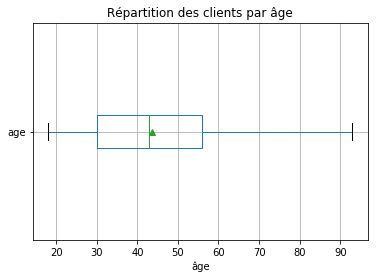

In [47]:
# Je vérifie la colonne age avec une boxplot : 
clients.boxplot(column='age', showmeans=True, vert = 0).set_title('Répartition des clients par âge')
plt.xlabel('âge')

plt.savefig('fig2.jpeg')

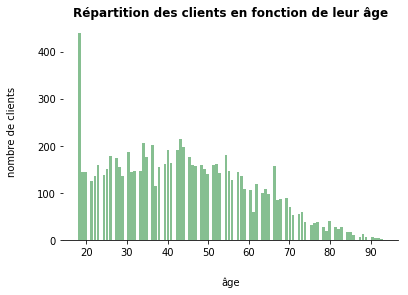

In [5]:
# Histogramme de répartition des clients par âge
ax = clients.hist(column='age', bins=100, grid=False, color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0] 
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)# Remove title
    # Set title
    x.set_title("Répartition des clients en fonction de leur âge", weight='bold')
    # Set x-axis label
    x.set_xlabel("âge", labelpad=20, size=10)
    # Set y-axis label
    x.set_ylabel("nombre de clients", labelpad=20, size=10)
plt.savefig('fig3.jpeg')

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


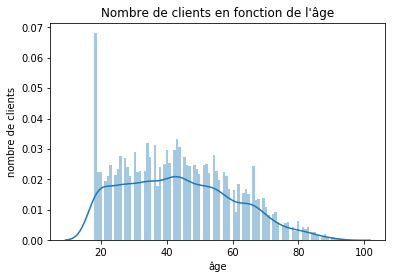

In [9]:
# En utilisant seaborn, histogramme avec la courbe de densité : 
sns.distplot(clients['age'], bins = 100).set(title = 'Nombre de clients en fonction de l\'âge')
plt.xlabel('âge')
plt.ylabel('nombre de clients')

plt.savefig('fig4.jpeg')

La classe d'âge 18 ans est surreprésentée. Peut-être que les clients de - de 18 ans sont enregistrés en tant que 18 ans ?  A retenir pour les analyses. 

In [6]:
# Je retire la classe d'âge 18 ans
clients_ss_18 = clients[clients['age'] != 18]

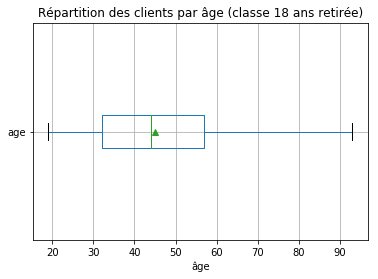

In [9]:
# Boxplot si on retire la classe d'âge 18 ans
clients_ss_18.boxplot(column='age', showmeans=True, vert = 0).set_title('Répartition des clients par âge (classe 18 ans retirée)')
plt.xlabel('âge')
plt.savefig('fig5.jpeg')

C:\Users\Zang\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


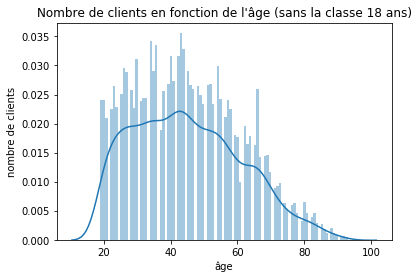

In [10]:
# En utilisant seaborn, histogramme avec la courbe de densité sans la classe d'âge 18 ans : 
sns.distplot(clients_ss_18['age'], bins = 100).set(title = 'Nombre de clients en fonction de l\'âge (sans la classe 18 ans)')
plt.xlabel('âge')
plt.ylabel('nombre de clients')
plt.savefig('fig6.jpeg')

### Ajout de la colonne classe d'âge

In [5]:
# Je le fais avec cut. cf. https://www.youtube.com/watch?v=06LZtiF5yGg
clients['classe_age'] = pd.cut(clients.age, bins=[17, 29, 49, 100], labels=['18-30', '30-50', '50+'])

In [60]:
clients.head()

,client_id,sex,birth,age,classe_age
0,c_4410,f,1967,55,50+
1,c_7839,f,1975,47,30-50
2,c_1699,f,1984,38,30-50
3,c_5961,f,1962,60,50+
4,c_5320,m,1943,79,50+


In [8]:
# Vérification au hasard
clients[clients['age']==30].sample(1)

,client_id,sex,birth,age,classe_age
648,c_2634,m,1992,30,30-50


In [69]:
# Vérification si présence de valeurs nulles
clients.isnull().sum()

client_id     0
sex           0
birth         0
age           0
classe_age    0
dtype: int64

#### Répartition des clients par classe d'âge

In [9]:
clients.classe_age.value_counts()

30-50    3413
50+      3116
18-30    2092
Name: classe_age, dtype: int64

In [233]:
# En pourcentage
clients.classe_age.value_counts(normalize=True)

30-50    0.395894
50+      0.361443
18-30    0.242663
Name: classe_age, dtype: float64

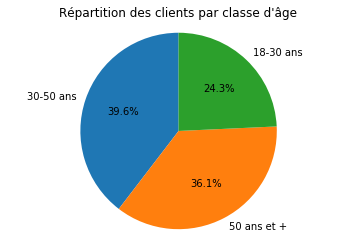

In [24]:
# Visualisation avec un pieplot
plt.pie(clients.classe_age.value_counts(normalize=True), 
       labels=["30-50 ans", "50 ans et +", "18-30 ans"], 
       autopct='%1.1f%%', 
       startangle=90
      )

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Répartition des clients par classe d\'âge')
plt.savefig('fig7.jpeg')

#### Répartition des clients par âge et par sexe

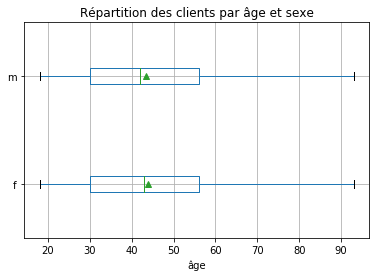

In [17]:
clients.boxplot(column='age', by='sex', vert = 0, showmeans=True)
plt.title('Répartition des clients par âge et sexe')
plt.suptitle('')
plt.xlabel('âge')

plt.savefig('fig8.jpeg')

On constate que les répartitions sont quasiment similaires. 

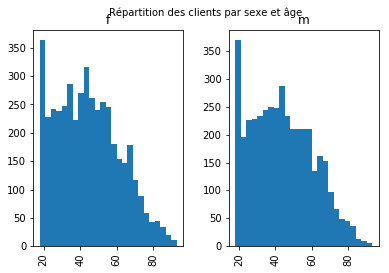

In [46]:
# Avec des histogrammes
clients.hist(column='age', by='sex', bins=25)
plt.suptitle("Répartition des clients par sexe et âge", size=10)
plt.savefig('fig9.jpeg')

RAS. Les répartitions sont très similaires.

## 2. Table produits

### Nettoyage

In [12]:
# Import des données de la table products
produits = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/data/products.csv")

In [47]:
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [78]:
produits.shape

(3287, 3)

In [83]:
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [48]:
# Doublons dans id_prod ?
produits[produits.duplicated()].sort_values(by='id_prod').head()

,id_prod,price,categ


id_prod est une clé primaire. 

In [12]:
# Vérification des types
produits.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [118]:
produits.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,1_633,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Plus de 3200 produits. 

In [119]:
# Un prix est = à -1, c'est bizarre
produits[produits['price']<=0]

,id_prod,price,categ
731,T_0,-1.0,0


In [120]:
# Je cherche s'il y a d'autres id_prod = T_0 : 
produits[produits['id_prod']=='T_0']

,id_prod,price,categ
731,T_0,-1.0,0


In [13]:
# Suppression du prix < 0
produits = produits.drop([731])

In [138]:
# Le prix max est de 300, ce qui semble bp compte tenu de la moyenne à 22
# Je regarde les prix supérieurs à 30
produits[produits['price'] > 200]

,id_prod,price,categ
10,2_228,225.17,2
95,2_128,201.74,2
394,2_158,247.22,2
724,2_76,254.44,2
786,2_40,228.11,2
947,2_2,300.00,2
1284,2_211,203.99,2
1436,2_167,236.99,2
1709,2_87,220.99,2
1896,2_4,222.97,2


Visiblement pas d'incohérence. Ce sont tous des produits de la catégorie 2, une catégorie visiblement plus oréneuse. 

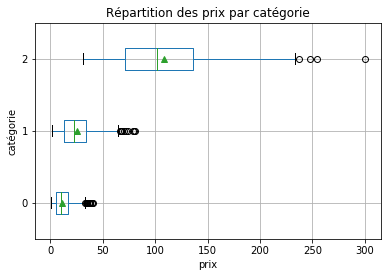

In [23]:
produits.boxplot(column='price', by='categ', vert = 0, showmeans=True)
plt.xlabel('prix')
plt.ylabel('catégorie')
plt.suptitle("")
plt.title('Répartition des prix par catégorie')

plt.savefig('fig10.jpeg')

Les prix de la catégorie 2 sont plus élevés que ceux des autres catégories.

#### Répartition des produits par catégorie

Catégorie 0: 2308 produits
Catégorie 1: 739 produits
Catégorie 2: 239 produits


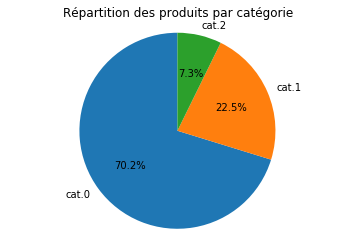

In [24]:
# Visualisation avec un pieplot 
plt.pie(produits.categ.value_counts(), labels=["cat.0", "cat.1", "cat.2"], autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Répartition des produits par catégorie')

plt.savefig('fig11.jpeg')

print(f"Catégorie 0: {produits[produits['categ']==0]['id_prod'].count()} produits")
print(f"Catégorie 1: {produits[produits['categ']==1]['id_prod'].count()} produits")
print(f"Catégorie 2: {produits[produits['categ']==2]['id_prod'].count()} produits")

#### Distribution des prix

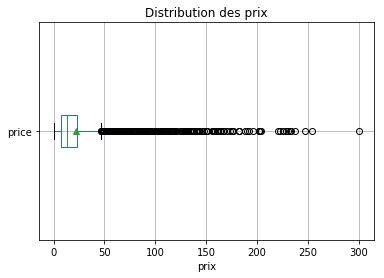

In [15]:
# Je vérifie la colonne price avec une boite à moustaches : 
produits.boxplot(column='price', showmeans=True, vert = 0).set_title('Distribution des prix')
plt.xlabel('prix')
plt.savefig('fig12.jpeg')

La partie centrale est particulièrement concentrée par rapport au reste de la distribution, beaucoup de produits ont des prix < 50 €.  
De nombreux prix sont uniques. 

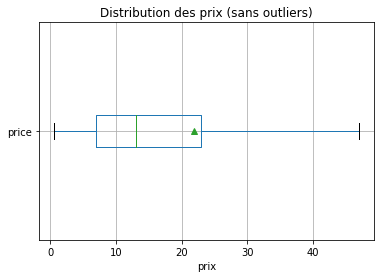

In [16]:
# Je vérifie la colonne price avec une boite à moustaches : 
produits.boxplot(column='price', showmeans=True, showfliers=False, vert = 0).set_title('Distribution des prix (sans outliers)')
plt.xlabel('prix')
plt.savefig('fig13.jpeg')

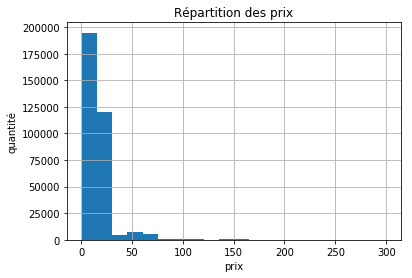

In [28]:
# Histogramme de répartition des prix : 
# Attention, réalisé après traitement du produit 0_2245 : imputation de la moyenne des prix de sa catégorie (voir plus bas).
plt.title('Répartition des prix')
cpv['price'].hist(bins=20)
plt.xlabel('prix')
plt.ylabel('quantité')

plt.savefig('fig14.jpeg')

On constate que de nombreux prix sont situés dans la fourchette 0 - 40 € environ. 

In [16]:
produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


- La moyenne des prix est de 22 €. 
- L'écart-type, plus élevé que la moyenne, montre une forte dispersion des prix. 
- La moitié des prix est situe entre 7 et 23 €. 
- Prix mini 0.62 €. 
- Prix max 300 €. 

## 3. Table transactions

### Nettoyage

In [18]:
# Import des données de la table transactions
ventes = pd.read_csv("C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/data/transactions.csv")

In [3]:
ventes.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [32]:
ventes.shape

(337016, 4)

In [64]:
# Affichage des valeurs nulles
ventes.isnull().values.any()

False

In [71]:
# Vérification si présence de doublons
ventes[ventes.duplicated()].sort_values(by='client_id').head()

,id_prod,date,session_id,client_id,heure


In [41]:
ventes.describe(include='all')

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


La table contient plus de 330 000 transactions. 

In [28]:
# Je repère les lignes des tests (session_id = s_0)
ventes.loc[(ventes["session_id"]=="s_0")].head()

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1


In [35]:
ventes.loc[(ventes["session_id"]=="s_0")]['id_prod'].count()

200

In [19]:
# Je supprime les lignes qui contiennent T_O
to_drop = ['T_0']
ventes = ventes[~ventes['id_prod'].isin(to_drop)]

In [62]:
# Vérification
ventes.loc[(ventes["session_id"]=="s_0")]

,id_prod,date,session_id,client_id


Nettoyage OK

In [22]:
# Vérification des types 
ventes.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [20]:
# Modification du type "date" en datetime
ventes['date'] = pd.to_datetime(ventes['date'])

In [20]:
# Vérification des types 
ventes.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [25]:
# Je créé une colonne avec une date plus simple à manipuler : 
# ventes['datessh'] = ventes['date'].dt.strftime('%Y-%m-%d')

In [8]:
ventes.describe(include='all')

,id_prod,date,session_id,client_id
count,336816,336816,336816,336816
unique,3265,336816,169194,8600
top,1_369,2021-06-30 11:35:55.387896,s_118668,c_1609
freq,1081,1,14,12855
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2022-02-28 23:59:58.040472,NaN,NaN


In [33]:
ventes.date.min()

Timestamp('2021-03-01 00:01:07.843138')

In [31]:
ventes.date.max()

Timestamp('2022-02-28 23:59:58.040472')

- 336 816 dates uniques. 
- commence au 1/03/2021, fin au 28/02/2022 => 1 année complète.

In [13]:
# Pas besoin
# Je sépare la colonne date en date et heure dans un df provisoire pour récupérer l'heure
# temp = ventes['date'].str.split(" ", n = 1, expand = True) 

In [14]:
# Pas besoin
# Ajout de la colonne date heure au df ventes
# ventes["heure"]= temp[1] 

## Jointures entre les tables

In [21]:
# Jointure 1 entre ventes et produits sur id_prod, outer pour garder toutes les données
cpv = ventes.merge(produits, how='outer')
cpv.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0


In [22]:
cpv.shape

(336838, 6)

In [23]:
# Jointure 2 entre le nouveau dataframe et clients sur client_id
cpv = cpv.merge(clients, how='outer')
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0


In [24]:
cpv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336859 entries, 0 to 336858
Data columns (total 9 columns):
id_prod       336838 non-null object
date          336816 non-null datetime64[ns]
session_id    336816 non-null object
client_id     336837 non-null object
price         336735 non-null float64
categ         336735 non-null float64
sex           336837 non-null object
birth         336837 non-null float64
age           336837 non-null float64
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 25.7+ MB


In [40]:
# Recherche des valeurs nulles
cpv_na = cpv.loc[cpv.isnull().any(axis=1)]

In [73]:
cpv_na

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
18202,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,NaN,NaN,f,1968.0,54.0,50+
18203,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,NaN,NaN,f,1968.0,54.0,50+
20708,0_2245,2021-04-17 16:43:16.543156,s_21906,c_7808,NaN,NaN,m,1977.0,45.0,30-50
27016,0_2245,2021-11-01 14:00:26.535213,s_113219,c_7810,NaN,NaN,m,1978.0,44.0,30-50
30498,0_2245,2021-09-11 10:52:05.205583,s_88251,c_3468,NaN,NaN,f,1981.0,41.0,30-50
31314,0_2245,2021-11-11 04:36:55.259042,s_117850,c_4333,NaN,NaN,m,1956.0,66.0,50+
36181,0_2245,2021-04-07 12:40:05.004874,s_17252,c_3454,NaN,NaN,m,1969.0,53.0,50+
36182,0_2245,2021-04-10 08:59:14.100780,s_18560,c_3454,NaN,NaN,m,1969.0,53.0,50+
37148,0_2245,2022-01-21 04:06:19.106398,s_152899,c_5352,NaN,NaN,f,1978.0,44.0,30-50
37931,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984.0,38.0,30-50


**Ce que l'on constate :** 
- Des produits n'ont pas été vendus.
- Des clients n'ont jamais rien acheté. 
- L'id_prod 0_2245 est enregistré dans ventes mais pas dans produits.   

In [44]:
# Recherche des produits invendus
p_inv = cpv_na.loc[cpv_na.client_id.isnull(), 'id_prod'].to_frame()
p_inv.count()

id_prod    22
dtype: int64

22 produits en tout n'ont pas été vendus. 

In [45]:
# Recherche des clients qui n'ont rien acheté : 
cl_ssach = cpv_na.loc[cpv_na.id_prod.isnull(), 'client_id'].to_frame()
cl_ssach.count()

client_id    21
dtype: int64

21 clients n'ont rien acheté du tout. 

**Traitement du produit 0_2245 :** 
En tout état de cause il a été vendu. Je suppose une anomalie à l'enregistrement de la vente. Je vais lui imputer la moyenne des prix de sa catégorie. 

In [25]:
# Je commence par imputer la catégorie de ce produit
catprod = 0
cpv.loc[cpv.id_prod=='0_2245', 'categ'] = catprod

In [26]:
# Calcul de la moyenne des prix de la catégorie de produits 0: 
moyprixcat0 = cpv.loc[cpv.categ == catprod, 'price'].mean()
moyprixcat0

10.647071995724621

In [27]:
# Ajout de cette moyenne dans la colonne prix de l'id_prod 0_2245
cpv.loc[cpv.id_prod=='0_2245', 'price'] = moyprixcat0

In [18]:
# Vérification
cpv[cpv.id_prod == '0_2245'].sample(1)

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
159164,0_2245,2021-03-02 15:55:49.728644,s_783,c_8060,10.647072,0.0,f,1979.0,43.0,30-50


### Clients / nombre de produits achetés

In [37]:
cpv.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977.0,45.0,30-50
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977.0,45.0,30-50
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977.0,45.0,30-50
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977.0,45.0,30-50


In [38]:
# Attention, il peut y avoir plusieurs achats par session. Par exemple :  
cpv[cpv['session_id']=='s_18746']

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,classe_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977.0,45.0,30-50
17,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,15.99,1.0,f,1977.0,45.0,30-50
65,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,3.99,0.0,f,1977.0,45.0,30-50


In [30]:
pac = cpv.groupby('client_id').agg({'price': 'sum'}).reset_index()

In [55]:
pac.head()

,client_id,price
0,c_1,300.65
1,c_10,586.18
2,c_100,222.87
3,c_1000,980.02
4,c_1001,1102.45


In [29]:
pac.describe()

,price
count,8621.000000
mean,672.506022
std,2563.075956
min,0.000000
25%,274.230000
50%,500.160000
75%,869.110000
max,162007.340000


In [64]:
ca = pac.price.sum()
ca

5797674.418415563

Le total des achats (le CA) est de 5.8 millions. 

In [30]:
# Le max price me semble très élevé, je vérifie : 
pac[pac['price'] > 4000]

,client_id,price
678,c_1609,162007.340000
2728,c_3454,54464.214144
4398,c_4958,144257.210000
6350,c_6714,73218.634144


In [66]:
# Calcul du montant acheté par ces clients
subca = pac[pac['price'] > 4000].sum() 
subca

client_id    c_1609c_3454c_4958c_6714
price                          433947
dtype: object

In [80]:
# En % du CA, ce que représentent ces clients
round((subca.price / ca) * 100, 2)

7.48

- 4 clients ont achetés chacun plus de 54 000 €, soit beaucoup plus que les autres clients.
- Ces clients ont dépensé plus de 400 000 €. 
- Il représentent presque 7.5 % du CA. 

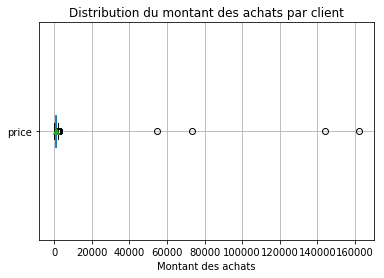

In [31]:
# Avec une boite à moustaches : 
pac.boxplot(column='price', showmeans=True, vert = 0).set_title('Distribution du montant des achats par client')
plt.xlabel('Montant des achats')
plt.savefig('fig15.jpeg')

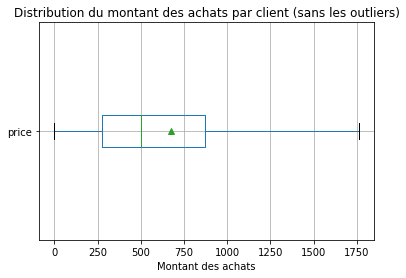

In [33]:
# Avec une boite à moustaches : 
pac.boxplot(column='price', showmeans=True, showfliers = False, vert = 0).set_title(
    'Distribution du montant des achats par client (sans les outliers)')
plt.xlabel('Montant des achats')
plt.savefig('fig16.jpeg')

##### Table sans les clients "grands comptes" : cpv_new

In [29]:
# Ce sont des clients particuliers, qui achètent en masse, contrairement aux autres clients. Ils pourraient bénéficier d'un 
# traitement particulier. Dans cette analyse, je les considèrerai parfois comme des outliers et les retirerai. Je créé un 
# nouveau df pour cela : 
cpv_new = cpv.loc[
    (cpv['client_id']!='c_1609')\
    & (cpv['client_id']!='c_3454')\
    & (cpv['client_id']!='c_4958')\
    & (cpv['client_id']!='c_6714')]

In [30]:
cpv_new.shape

(313694, 10)

##### Table sans les clients "grands comptes" et sans les clients de 18 ans : cpv_ss_ab

In [31]:
# Je retire aussi les clients qui ont 18 ans : 
cpv_ss_ab = cpv_new[cpv_new['age']!=18]

In [32]:
cpv_ss_ab.shape

(306343, 10)

#### Enregistrement des dataframes : 

In [33]:
cpv.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv.csv', index=False)
cpv_new.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv_new.csv', index=False)
cpv_ss_ab.to_csv('C:/Users/Zang/Documents/APPRENDER/OPENCLASSROOMS/PARCOURS DA/P4_Analysez_les_ventes_de_votre_entreprise/cpv_ss_ab.csv', index=False)